## Exercise 1 : Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

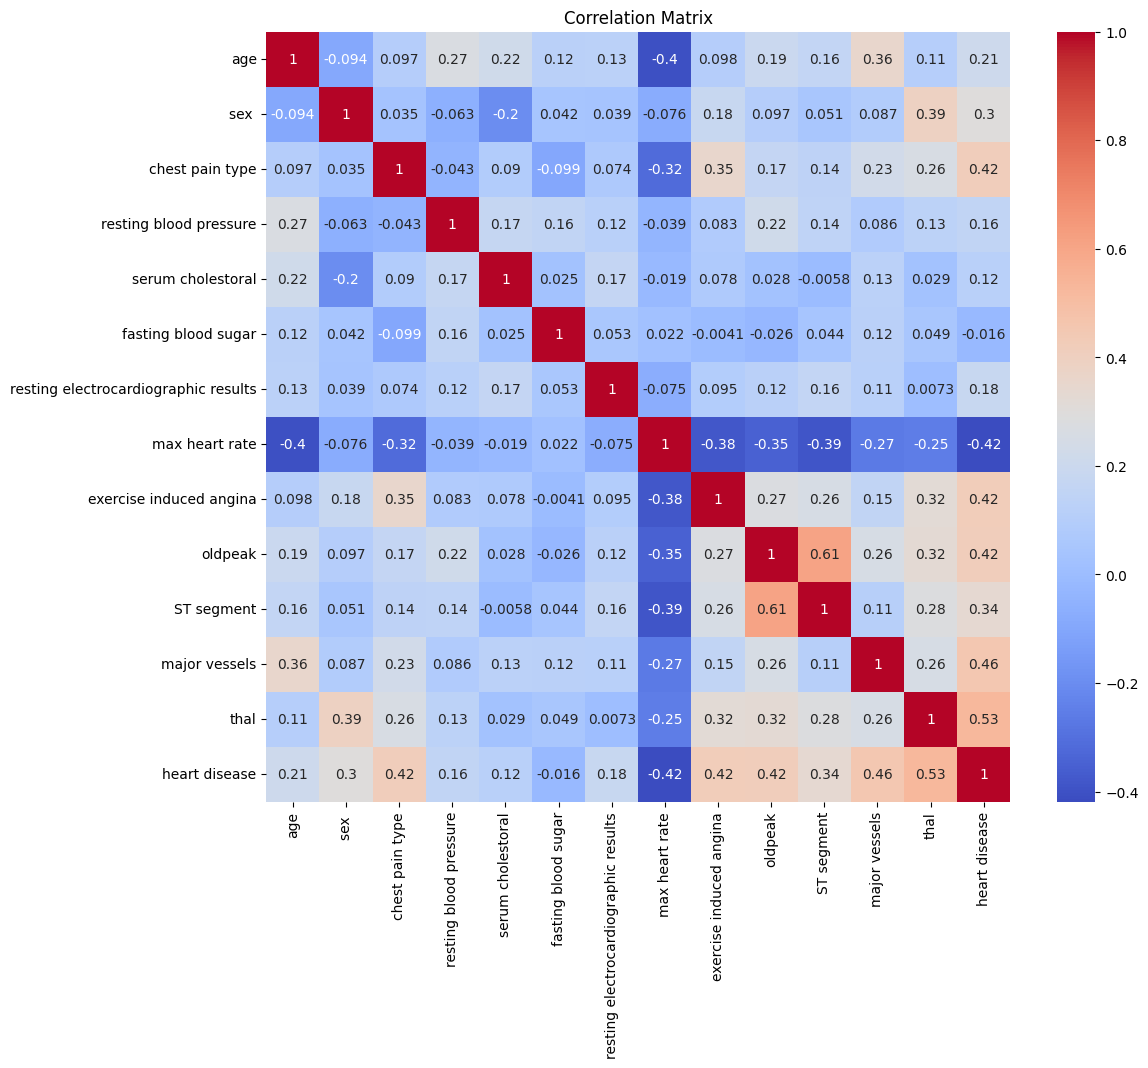

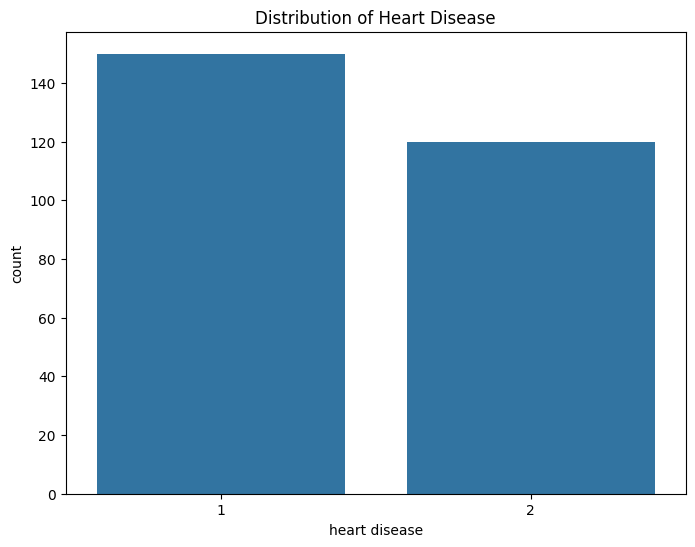

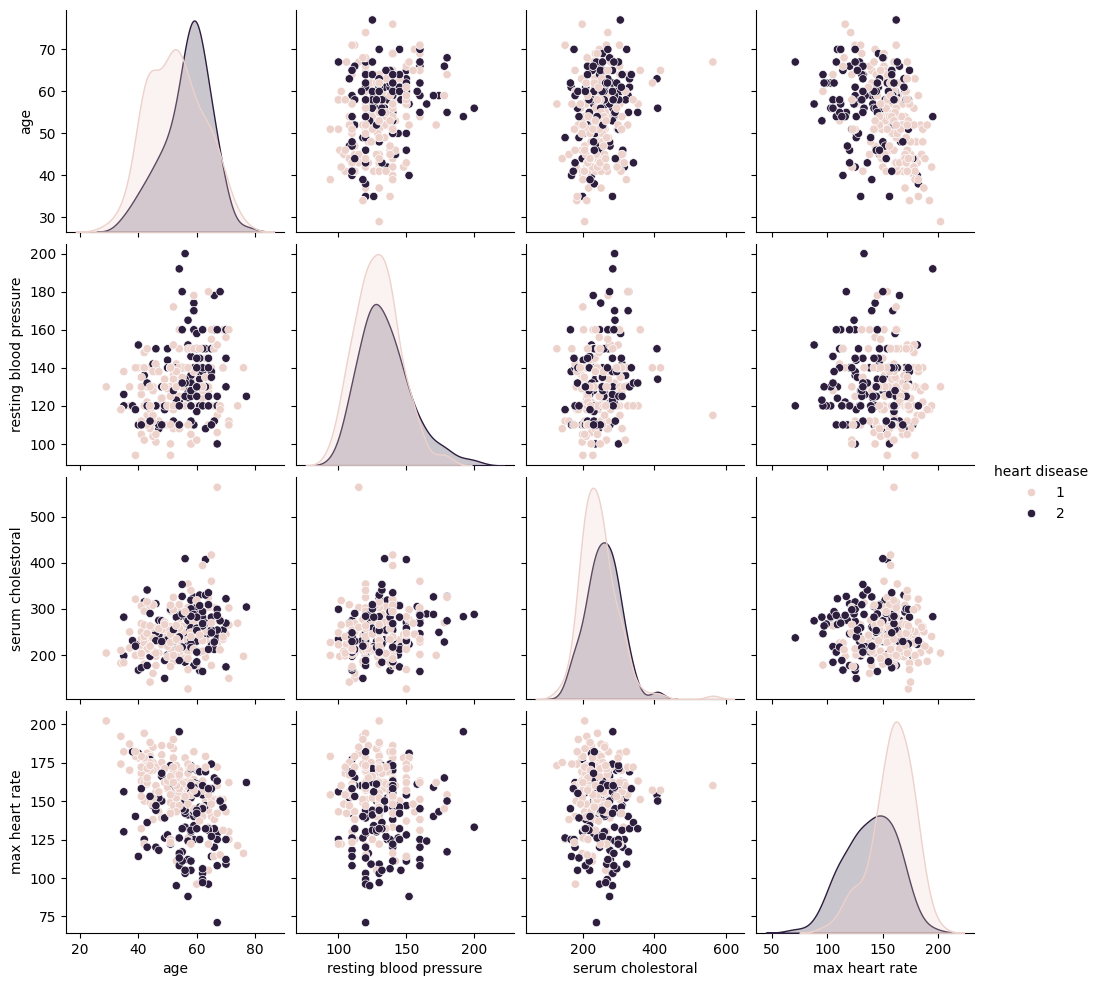

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('dataset_heart.csv')

# Remove target column from the training data
X = data.drop('heart disease', axis=1)
y = data['heart disease']

# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Understand the data
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='heart disease', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

# Pairplot for selected features
sns.pairplot(data[['age', 'resting blood pressure', 'serum cholestoral', 'max heart rate', 'heart disease']], hue='heart disease')
plt.show()

## Exercise 2 : Logistic Regression without Grid Search

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression (without Grid Search) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression (without Grid Search) Results:
Accuracy: 0.9074074074074074

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Exercise 3 : Logistic Regression with Grid Search

In [3]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform grid search
lr_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Best model
best_lr = lr_grid.best_estimator_

# Make predictions
y_pred = best_lr.predict(X_test)

print("Logistic Regression (with Grid Search) Results:")
print("Best parameters:", lr_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression (with Grid Search) Results:
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9074074074074074

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



## Exercise 4: SVM without Grid Search

In [4]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

print("SVM (without Grid Search) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM (without Grid Search) Results:
Accuracy: 0.6296296296296297

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.79      0.72        33
           2       0.53      0.38      0.44        21

    accuracy                           0.63        54
   macro avg       0.60      0.58      0.58        54
weighted avg       0.61      0.63      0.61        54



## Exercise 5: SVM with Grid Search

In [5]:
# Use a subset of the data
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

# Original parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform grid search on subset
svm_grid_subset = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
svm_grid_subset.fit(X_subset, y_subset)

# Train final model on full training data with best parameters
best_svm = SVC(**svm_grid_subset.best_params_, random_state=42)
best_svm.fit(X_train, y_train)

# Make predictions
y_pred = best_svm.predict(X_test)

print("SVM (Grid Search on Subset) Results:")
print("Best parameters:", svm_grid_subset.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM (Grid Search on Subset) Results:
Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 0.6851851851851852

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.79      0.75        33
           2       0.61      0.52      0.56        21

    accuracy                           0.69        54
   macro avg       0.67      0.66      0.66        54
weighted avg       0.68      0.69      0.68        54



## Exercise 6: XGBoost without Grid Search

In [8]:
# Convert target variable to binary classes
y = y.replace({1: 0, 2: 1})

# Split the data into train/test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost (without Grid Search) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

NameError: name 'XGBClassifier' is not defined

## Exercise 7: XGBoost with Grid Search

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5]
}

# Perform grid search
xgb_grid = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Best model
best_xgb = xgb_grid.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

print("XGBoost (with Grid Search) Results:")
print("Best parameters:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance for the best model
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (XGBoost with Grid Search)')
plt.show()